In [236]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, plot_roc_curve

In [237]:
df = pd.read_csv('heart_2020_cleaned.csv')

df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [238]:
df.shape

(319795, 18)

In [239]:
# проверяем, есть ли колонки, содержащие значения Null или NaN

df.columns[df.isna().any()].tolist()

[]

In [240]:
# количество уникальных значений в каждой колонке

df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [241]:
# поскольку в колонке Diabitic присутствут 5 разных знаачений, есть смысл изучить их подробнее

df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [242]:
# также изучим колонку GenHealth
 
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [243]:
# изучааем типы данных в колонках

df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [244]:
# кодируем строковые данные

cols_to_encode = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 
    'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 
    'Asthma', 'KidneyDisease', 'SkinCancer']

for col in cols_to_encode:
    enc = LabelEncoder()
    enc.fit(df[col])
    df[col] = enc.transform(df[col])

df.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            7     5         2   
1           0.0            0    0           12     5         0   
2          30.0            0    1            9     5         2   
3           0.0            0    0           11     5         0   
4           0.0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4        5.0       1              0           1  
1                 1          4        7.0       0              0           0  
2                 1          1        8.0       1              0           0  
3                 0          2        6.0       0              0           1  
4                 1          4        8.0       0              0           0

In [245]:
# соотношение здоровых и больных в исходных данных

heart_disease = df['HeartDisease']

deceased_only = df.loc[heart_disease == 1]
healthy_only = df.loc[heart_disease == 0]

deceased_count = len(deceased_only)
healthy_count = len(healthy_only)
total_count = len(heart_disease)

healthy_count, deceased_count, healthy_count / total_count

(292422, 27373, 0.9144045404086993)

In [246]:
# составляем датасет для обучения таким образом, 
# чтобы соотношение больных и здоровых в нем было одинаковым

corrected_df = pd.concat([deceased_only, healthy_only.sample(deceased_count)]).sample(frac=1)

corrected_df.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
171511             1  45.01        0                0       0            30.0   
115336             0  30.41        0                0       0             0.0   
66272              0  21.29        0                0       0             0.0   
75466              0  26.50        1                0       0             0.0   
264053             0  26.61        0                0       0            10.0   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
171511          21.0            1    1            8     5         1   
115336           0.0            0    1            4     5         0   
66272           30.0            1    1            7     1         0   
75466            0.0            0    1            7     5         0   
264053          12.0            0    1            3     3         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
171511                 0          3        6.0       0              0   
115336                 1          4        8.0       0              0   
66272                  1          2        8.0       0              0   
75466                  1          4        4.0       0              0   
264053                 0          1        8.0       0              0   

        SkinCancer  
171511           0  
115336           0  
66272            0  
75466            0  
264053           0

In [247]:
# в первой колонке (HeartDisease) - признак, по которому классифицируем

test_on = corrected_df.iloc[:, :1]
train_on = corrected_df.iloc[:, 1:]

# также я решил исключить несколько колонок из данных, на которых будет обучаться модель
cols_to_exclude = ['PhysicalHealth', 'MentalHealth', 'Race']
train_on = train_on.drop(cols_to_exclude, axis=1)

train_on.head()


BMI  Smoking  AlcoholDrinking  Stroke  DiffWalking  Sex  \
171511  45.01        0                0       0            1    1   
115336  30.41        0                0       0            0    1   
66272   21.29        0                0       0            1    1   
75466   26.50        1                0       0            0    1   
264053  26.61        0                0       0            0    1   

        AgeCategory  Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  \
171511            8         1                 0          3        6.0       0   
115336            4         0                 1          4        8.0       0   
66272             7         0                 1          2        8.0       0   
75466             7         0                 1          4        4.0       0   
264053            3         0                 0          1        8.0       0   

        KidneyDisease  SkinCancer  
171511              0           0  
115336              0           0  
66272               0           0  
75466               0           0  
264053              0           0

In [248]:
# разбиваем исходные данные в соотношении 2 к 1
# большая часть будет использоваться для обучения, меньшая - для тестирования

x_train, x_test, y_train, y_test = train_test_split(train_on, test_on, test_size=0.33, random_state=0)

x_train.shape, x_test.shape

((36679, 14), (18067, 14))

In [249]:
# подбор параметров классификатора

min_range = 1
max_range = 15

tuned_parameters = {
    'max_depth': range(min_range, max_range + 1)
}

clf = GridSearchCV(
    tree.DecisionTreeClassifier(), param_grid=tuned_parameters, cv=5)
clf.fit(x_train, y_train)

clf.best_params_


{'max_depth': 9}

In [250]:
best_clf = clf.best_estimator_
best_clf.fit(x_train, y_train)

best_clf.score(x_test, y_test)

0.7508164056013726

In [251]:
y_pred = best_clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      9088
           1       0.72      0.81      0.76      8979

    accuracy                           0.75     18067
   macro avg       0.75      0.75      0.75     18067
weighted avg       0.75      0.75      0.75     18067



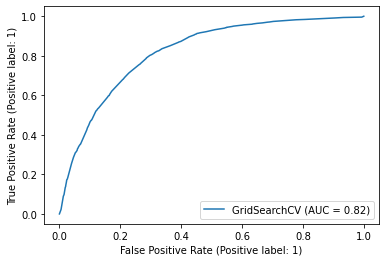

In [252]:
plot_roc_curve(clf, x_test, y_test)